# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

In [6]:
# Setting up a list of spine sides to iterate through
#################################################################################################
spine_sides = ['left', 'bottom']

# Updating matplotlib rcParams to the desired settings
#################################################################################################
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}',
                     'font.family': ['sans-serif', 'serif'],
                     'font.sans-serif': ['Verdana'],
                     'font.serif': ['New Century Schoolbook'],
                     'mathtext.fontset': 'cm'})

# Uncomment to check and/or change keys
#################################################################################################
# plt.rcParams.keys()

In [7]:
# Function to get a color between a given color and pure white based on a number between 0 and 1.
# A higher light_frac results in lighter color.
#################################################################################################
def get_lighter_color(color_name, light_frac):
    color_map = LinearSegmentedColormap.from_list('', [color_name,'w'], N=9)
    return color_map(light_frac)

In [8]:
# Function for Tick Params Settings for Histograms
#################################################################################################
def tick_params(h_ax):
    grid_kw = dict(color='dimgrey', linewidth=3, zorder=0)
    maj_gr_kw = dict(length=12, width=2.4, labelsize=19.5, labelcolor='k', color=(0,0,0,.63))
    min_gr_kw = dict(length=9, width=1.2, color=(0,0,0,.63))
    #------------------------------------------------------------------------------------------------
    maj_reg_kw = dict(length=12, width=2.4, labelsize=19.5, labelcolor='k', color=(0,0,0,.63))
    #------------------------------------------------------------------------------------------------
    top_spine_kw = dict(color='dimgrey', linewidth=3, zorder=0, alpha=.09)
    spine_kw = dict(color='k', lw=2.4, alpha=.63, zorder=9)
    #------------------------------------------------------------------------------------------------
    h_ax.minorticks_on()
    h_ax.grid(True, which='major', axis='y', alpha=.09, **grid_kw)  
    #--------------------------------------------------------------------------------------------
    h_ax.tick_params('y', **maj_gr_kw)
    h_ax.tick_params('y', which='minor', **min_gr_kw)
    #--------------------------------------------------------------------------------------------
    h_ax.tick_params('x', **maj_reg_kw)
    h_ax.tick_params('x', which='minor', bottom=False)
    #--------------------------------------------------------------------------------------------
    [h_ax.spines[side].update(spine_kw) for side in spine_sides]
    h_ax.spines['top'].update(top_spine_kw)
    h_ax.spines['right'].set_visible(False)

In [9]:
# Function to format y ticks
#################################################################################################
def x_hist_convert(x, pos):
    s = r'{\fontsize{21}{0}\selectfont{$\mathbf{'+'{:.0f}'.format(x)+'}$}}'
    return s

# Function to format y ticks
#################################################################################################
def y_hist_convert(y, pos):
    s = r'{\fontsize{21}{0}\selectfont{$\mathbf{'+'{:.0f}'.format(y)+'}$}}'
    return s

# Function to format currency ticks
#################################################################################################
def hist_currency(x, pos):
    if x>=1*1e6:
        s = r'{\fontsize{21}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+\
            '{:.0f}'.format(x*1e-6)+'}$}}'+r'{\fontsize{18}{0}\selectfont{\scshape{M}}}'
    if 1*1e3<x<1*1e6:
        s = r'{\fontsize{21}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+\
            '{:.0f}'.format(x*1e-3)+'}$}}'+r'{\fontsize{18}{0}\selectfont{\scshape{K}}}'
    if x==0:
        s = r'{\fontsize{21}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+str(0)+'}$}}'
    return s

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

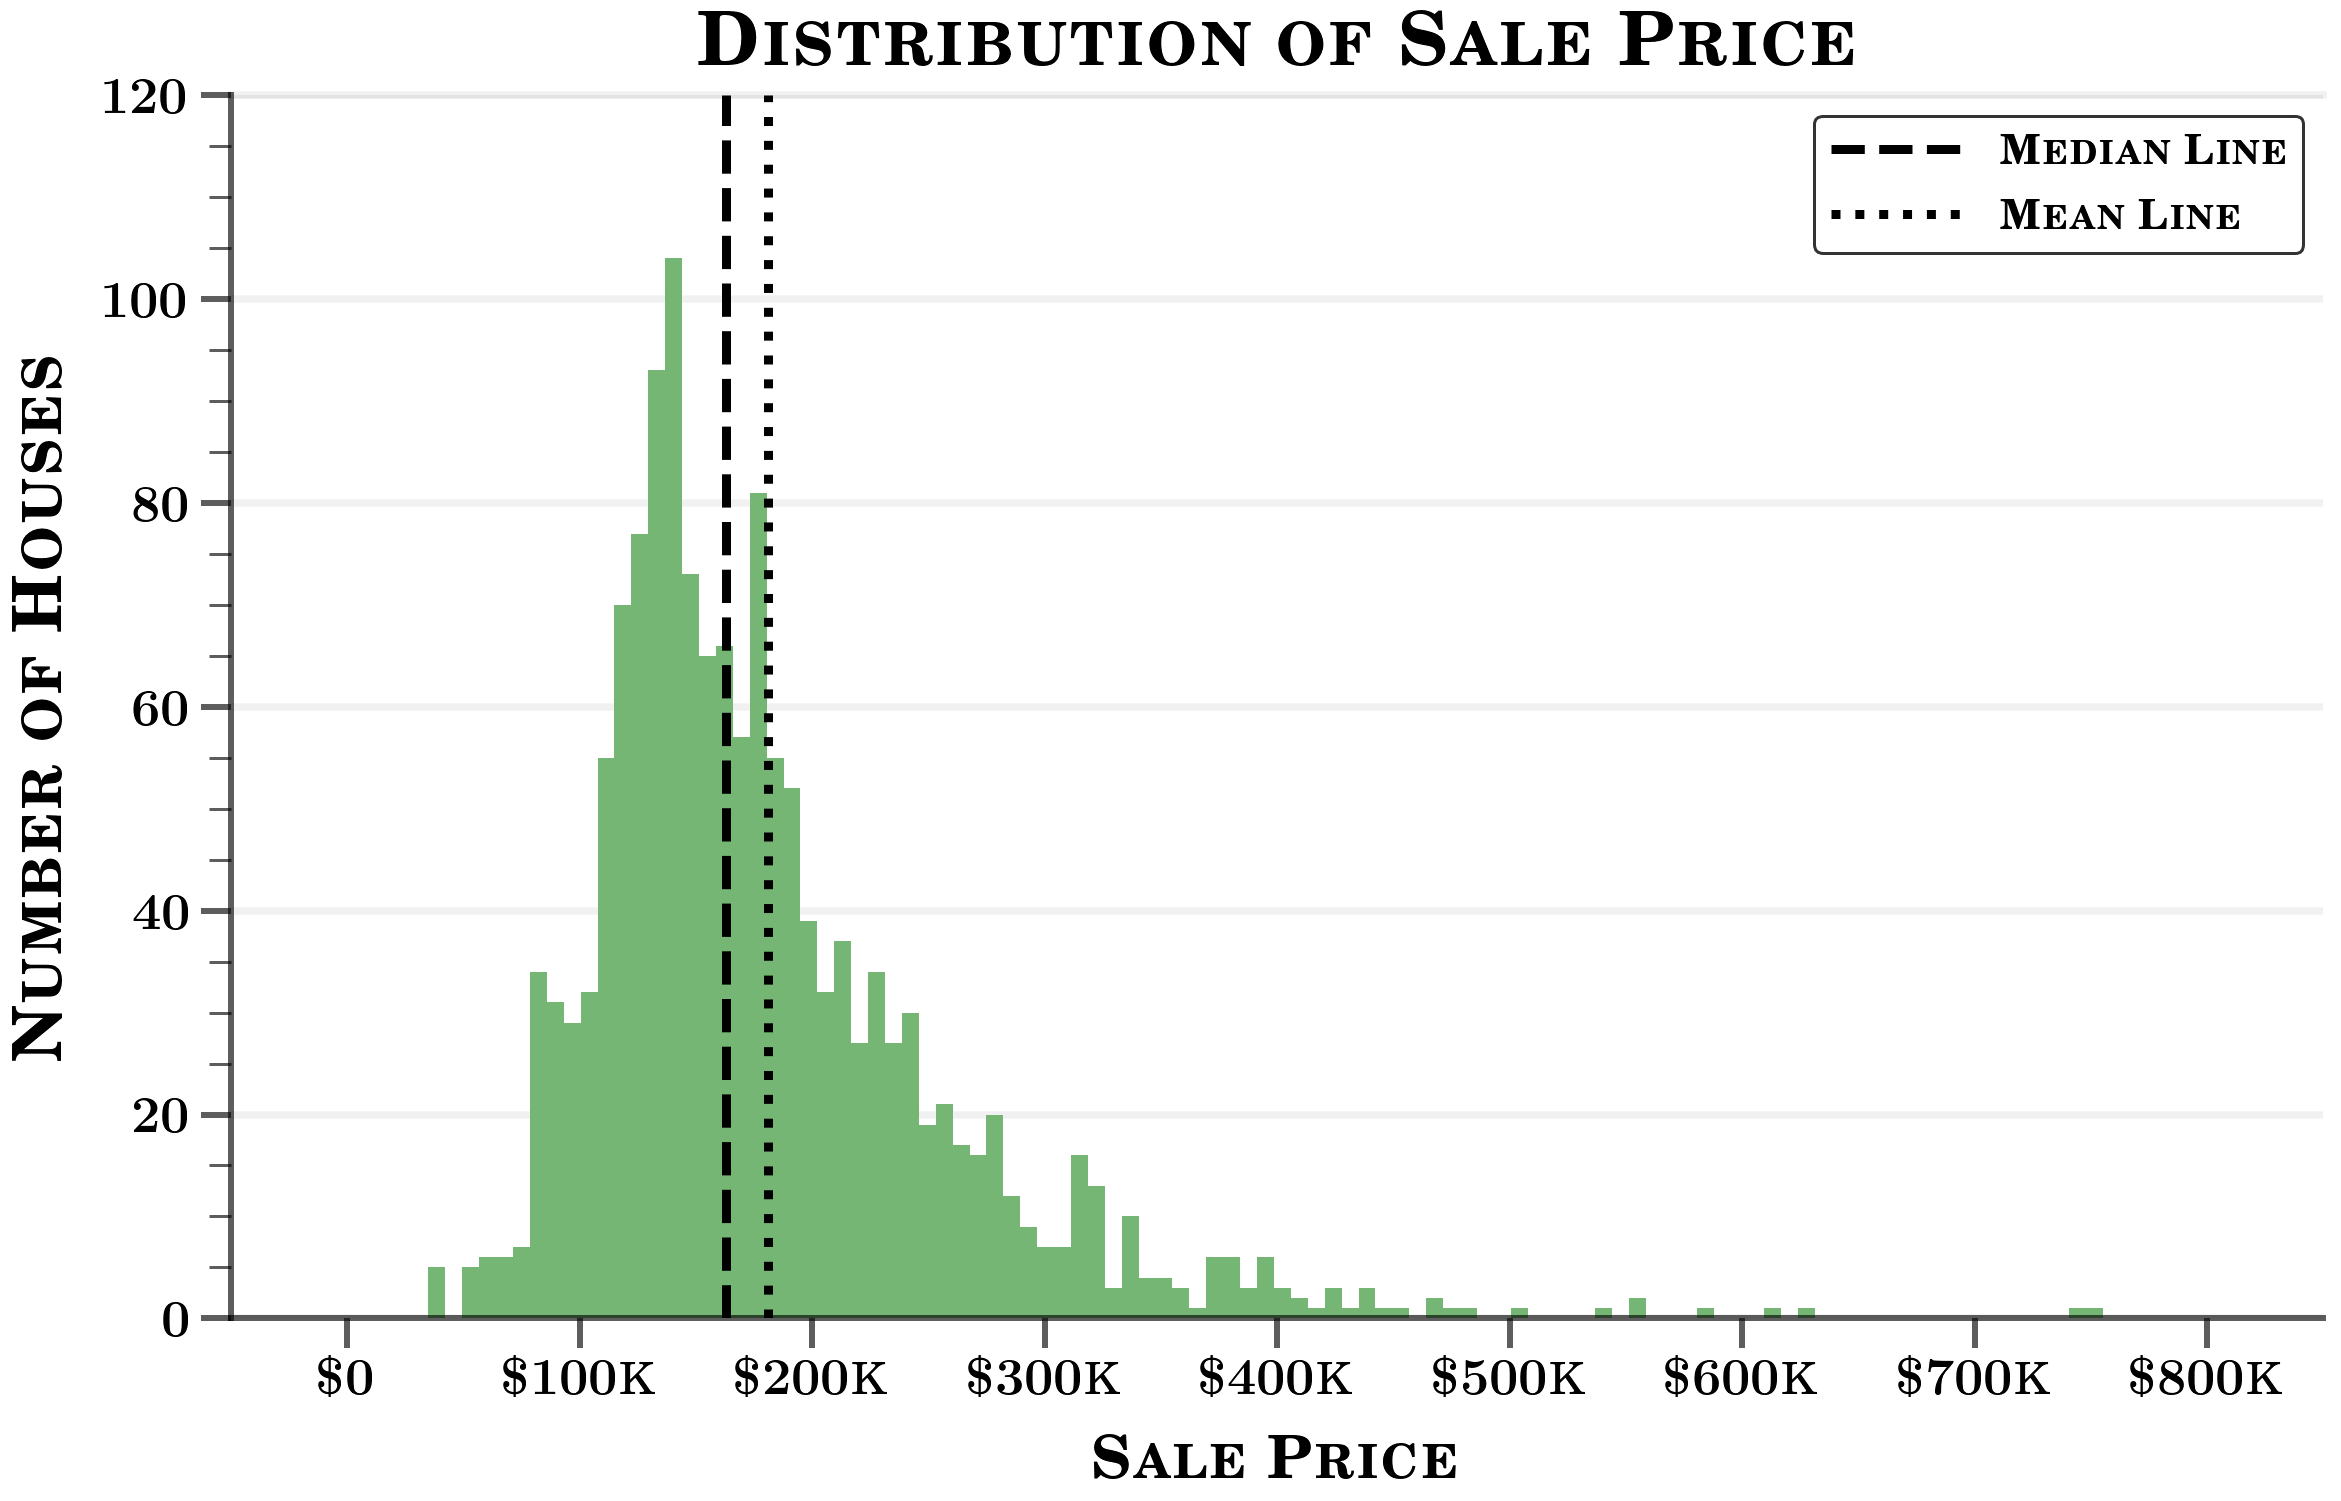

In [10]:
# Function for plot tile
#################################################################################################
def plot_title(tit):
    s = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{'+tit+'}}}'
    return s

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(15,9), dpi=180)
gs = fig.add_gridspec(1, 1)
ax = gs.subplots()
renderer = fig.canvas.get_renderer()

# Getting and plotting the data
#################################################################################################
hist_kw = dict(color=get_lighter_color('forestgreen', .36), zorder=9)
#------------------------------------------------------------------------------------------------
sale_price = df['SalePrice']
sale_hist = ax.hist(sale_price, bins=99, **hist_kw)

# X Ticks
#################################################################################################
v_line_kw = dict(color='k', lw=3.6, zorder=9)
#------------------------------------------------------------------------------------------------
x_median = sale_price.median()
x_mean = sale_price.mean()
x_max = sale_price.max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 1e5
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 1e5
#------------------------------------------------------------------------------------------------
x_step = x_max/8
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(hist_currency)
ax.set_xbound(-(1e5/2), x_max+(1e5/2))
#------------------------------------------------------------------------------------------------
med_line = ax.axvline(x_median, label=r'\textbf{\scshape{Median Line}}', ls='--', **v_line_kw)
mean_line = ax.axvline(x_mean, label=r'\textbf{\scshape{Mean Line}}', ls=':', **v_line_kw)

# Y Ticks
#################################################################################################
y_max = max(sale_hist[0])
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 20
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 20
#------------------------------------------------------------------------------------------------
y_step = y_max/6
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(y_hist_convert)

# Tick Params
#################################################################################################
tick_params(ax)

# Customize labels and title
#################################################################################################
lab_kw = dict(labelpad=15)
x_lab = 'Sale Price'
y_lab = 'Number of Houses'
tit = 'Distribution of Sale Price'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{24}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
ax.set_title(plot_title(tit), pad=12)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
leg_font_kw = dict(size=16.5)
leg_kw = dict(bbox_to_anchor=(1,1), loc='upper right', prop=leg_font_kw, labelspacing=.63, 
              handlelength=3.3)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg = ax.legend(handles=[med_line, mean_line], **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Sale Price Dist.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Now, print out the mean, median, and standard deviation:

In [11]:
print('\033[1m'+'\033[4m'+'Sale Price Distribution'+'\033[0m')
print('\033[1m'+'Mean = '+'\033[0m', '{:.3f}'.format(df['SalePrice'].mean()))
print('\033[1m'+'Std Dev = '+'\033[0m', '{:.3f}'.format(df['SalePrice'].std()))
print('-------------------------------------------')
print('\033[1m'+'5% = '+'\033[0m', '{:.0f}'.format(df['SalePrice'].quantile(.05)))
print('\033[1m'+'Median = '+'\033[0m', '{:.0f}'.format(df['SalePrice'].median()))
print('\033[1m'+'95% = '+'\033[0m', '{:.0f}'.format(df['SalePrice'].quantile(.95)))
print('-------------------------------------------')
display(df['SalePrice'].describe())

Sale Price Distribution
Mean =  180921.196
Std Dev =  79442.503
-------------------------------------------
5% =  88000
Median =  163000
95% =  326100
-------------------------------------------


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In the cell below, interpret the above information.

In [12]:
print('Distribution has a large postive skew and has many outliers to the right.')
print('50% of sale prices were between 130k and 215k.')
print('90% of sale prices were between 88k and 325k.')

Distribution has a large postive skew and has many outliers to the right.
50% of sale prices were between 130k and 215k.
90% of sale prices were between 88k and 325k.


### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

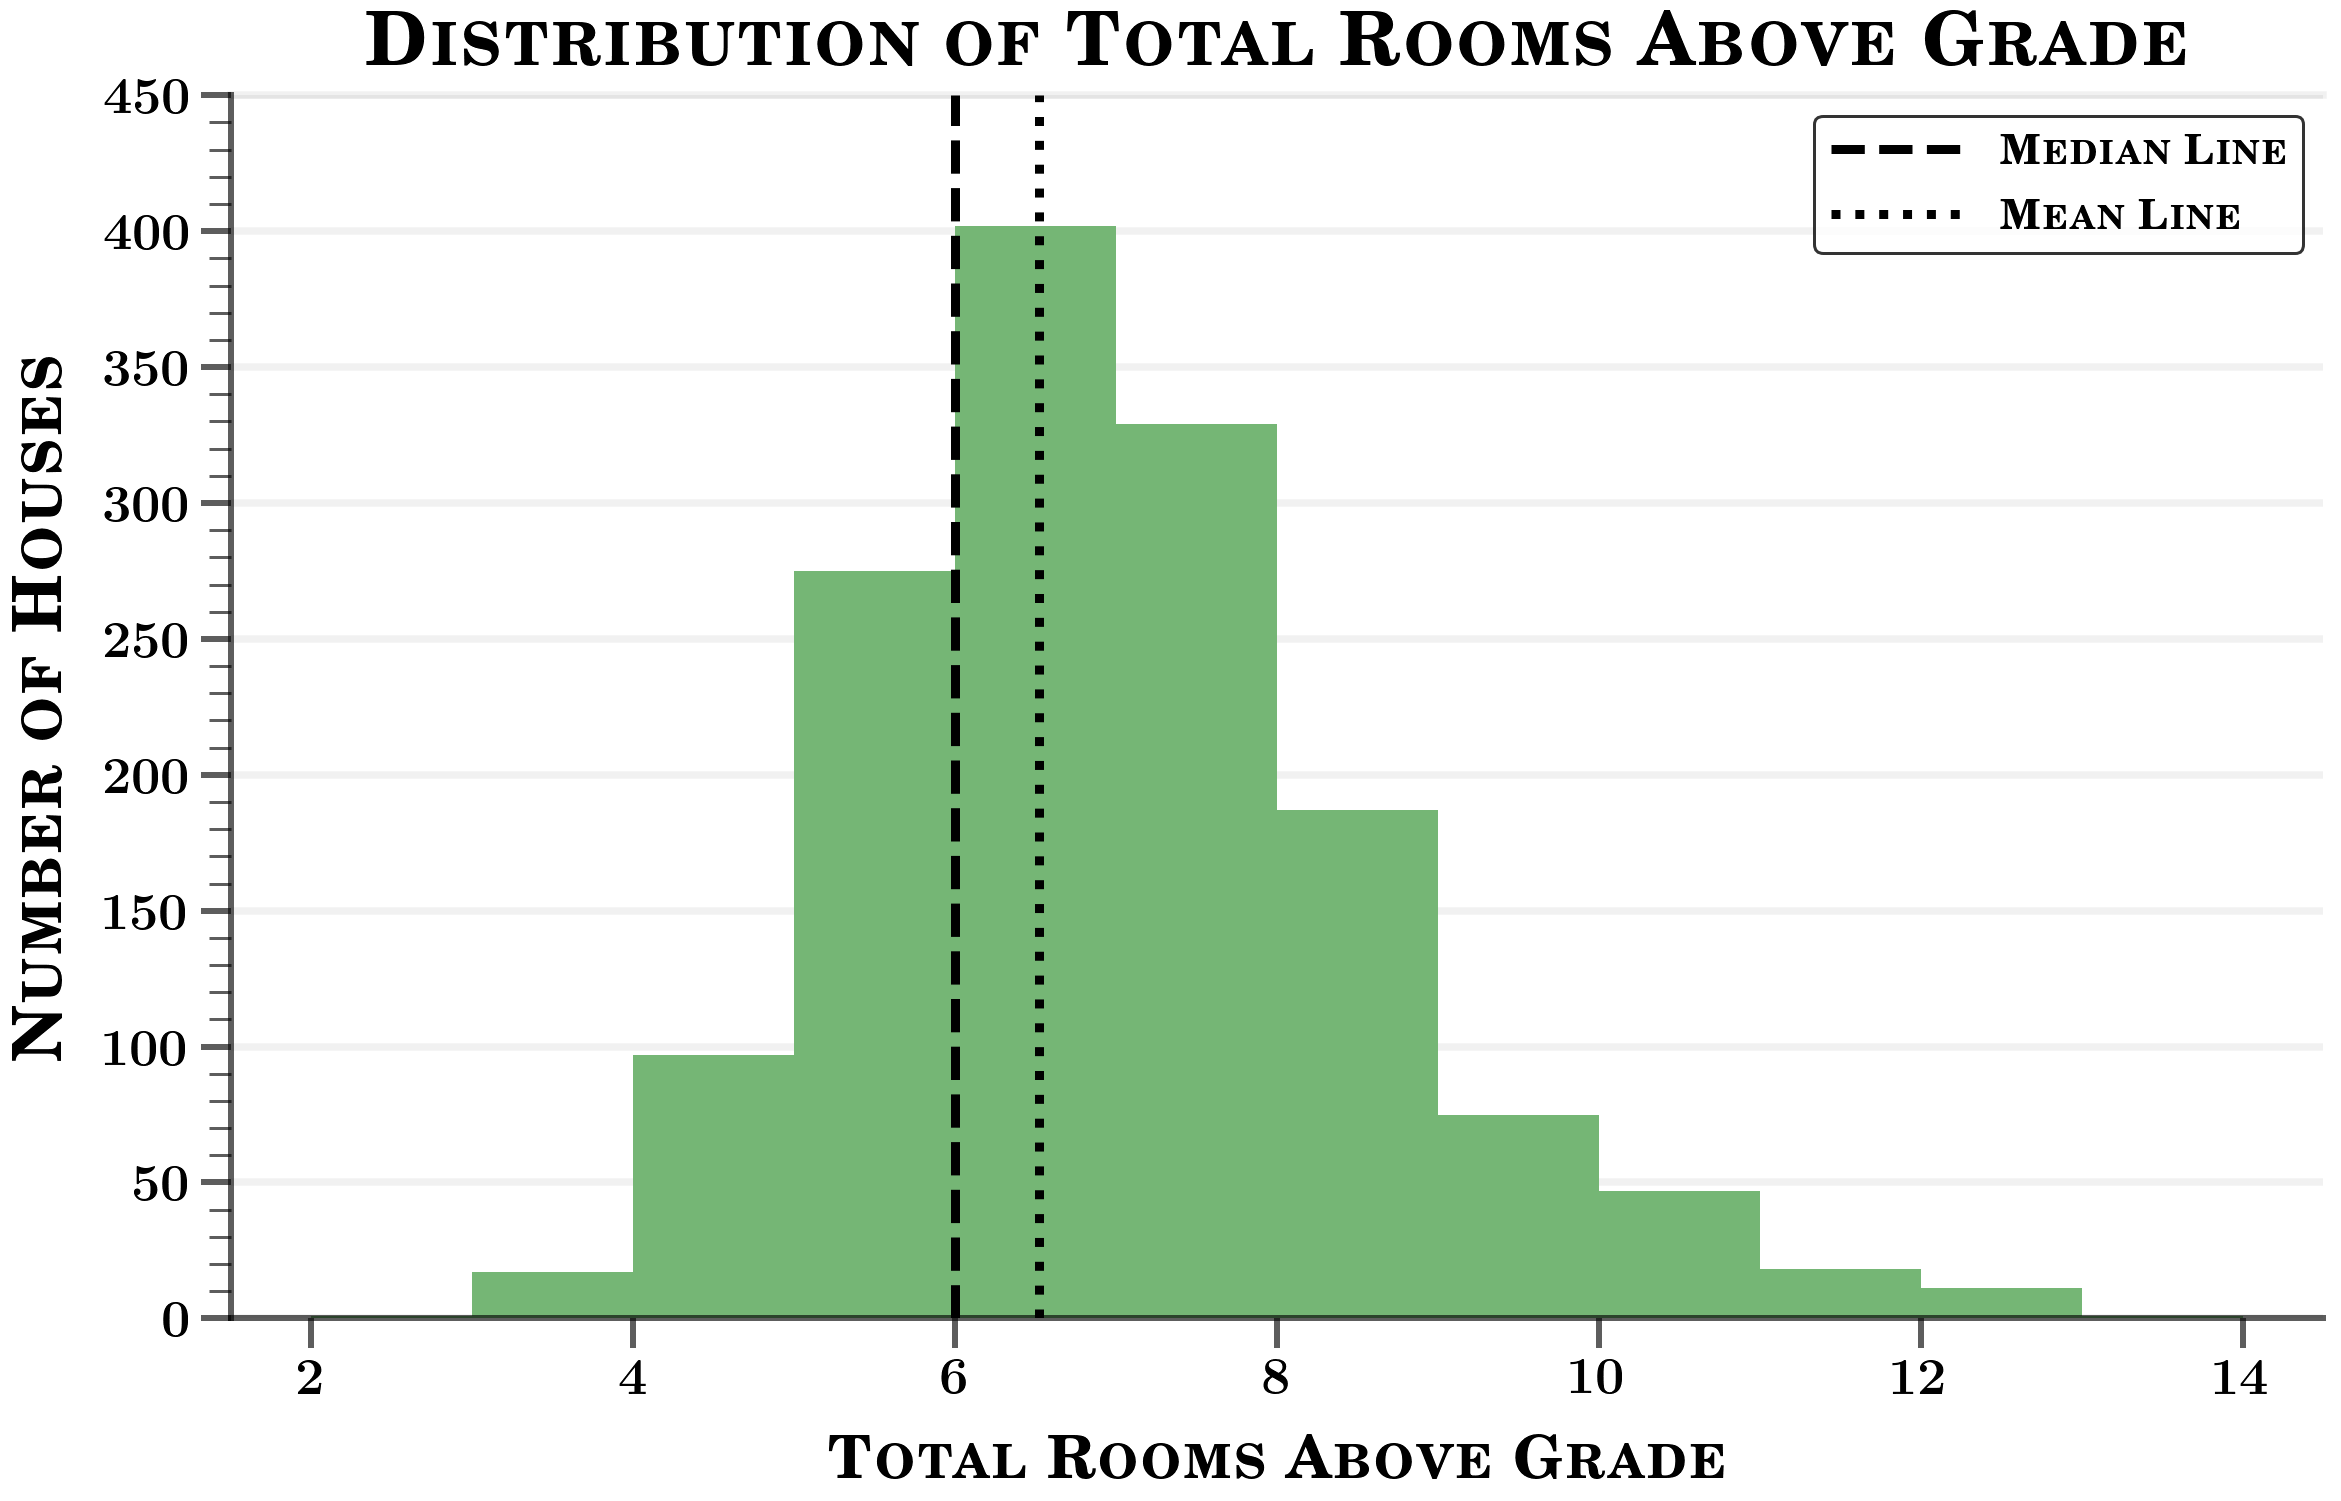

In [13]:
# Function for plot tile
#################################################################################################
def plot_title(tit):
    s = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{'+tit+'}}}}'
    return s

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(15,9), dpi=180)
gs = fig.add_gridspec(1, 1)
ax = gs.subplots()
renderer = fig.canvas.get_renderer()

# Getting and plotting the data
#################################################################################################
hist_kw = dict(color=get_lighter_color('forestgreen', .36), zorder=9)
#------------------------------------------------------------------------------------------------
trag_ser = df['TotRmsAbvGrd']
n_bins = df['TotRmsAbvGrd'].nunique()
trag_hist = ax.hist(trag_ser, bins=n_bins, **hist_kw)

# X Ticks
#################################################################################################
v_line_kw = dict(color='k', lw=3.6, zorder=9)
#------------------------------------------------------------------------------------------------
x_median = trag_ser.median()
x_mean = trag_ser.mean()
x_min = trag_ser.min()
x_max = trag_ser.max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 1
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 1
#------------------------------------------------------------------------------------------------
x_step = (x_max-x_min)/6
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(x_hist_convert)
ax.set_xbound(x_min-.5, x_max+.5)
#------------------------------------------------------------------------------------------------
med_line = ax.axvline(x_median, label=r'\textbf{\scshape{Median Line}}', ls='--', **v_line_kw)
mean_line = ax.axvline(x_mean, label=r'\textbf{\scshape{Mean Line}}', ls=':', **v_line_kw)

# Y Ticks
#################################################################################################
y_max = max(trag_hist[0])
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 50
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 50
#------------------------------------------------------------------------------------------------
y_step = y_max/9
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(y_hist_convert)

# Tick Params
#################################################################################################
tick_params(ax)

# Customize labels and title
#################################################################################################
lab_kw = dict(labelpad=15)
x_lab = 'Total Rooms Above Grade'
y_lab = 'Number of Houses'
tit = 'Distribution of Total Rooms Above Grade'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{24}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
ax.set_title(plot_title(tit), pad=12)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
leg_font_kw = dict(size=16.5)
leg_kw = dict(bbox_to_anchor=(1,1), loc='upper right', prop=leg_font_kw, labelspacing=.63, 
              handlelength=3.3)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg = ax.legend(handles=[med_line, mean_line], **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Total Rooms Above Grade Dist.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Now, print out the mean, median, and standard deviation:

In [14]:
print('\033[1m'+'\033[4m'+'Total Rooms Above Grade Distribution'+'\033[0m')
print('\033[1m'+'Mean = '+'\033[0m', '{:.3f}'.format(df['TotRmsAbvGrd'].mean()))
print('\033[1m'+'Std Dev = '+'\033[0m', '{:.3f}'.format(df['TotRmsAbvGrd'].std()))
print('-------------------------------------------')
print('\033[1m'+'5% = '+'\033[0m', '{:.0f}'.format(df['TotRmsAbvGrd'].quantile(.05)))
print('\033[1m'+'Median = '+'\033[0m', '{:.0f}'.format(df['TotRmsAbvGrd'].median()))
print('\033[1m'+'95% = '+'\033[0m', '{:.0f}'.format(df['TotRmsAbvGrd'].quantile(.95)))
print('-------------------------------------------')
display(df['TotRmsAbvGrd'].describe())

Total Rooms Above Grade Distribution
Mean =  6.518
Std Dev =  1.625
-------------------------------------------
5% =  4
Median =  6
95% =  10
-------------------------------------------


count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In the cell below, interpret the above information.

In [15]:
print('Distribution has slight positive skew, but it is a very tight distribution, '+\
      'so its not very obvious.')
print('It does not seem to have many outliers.')
print('50% of values were between 5 and 7.')
print('90% of values were between 4 and 10.')

Distribution has slight positive skew, but it is a very tight distribution, so its not very obvious.
It does not seem to have many outliers.
50% of values were between 5 and 7.
90% of values were between 4 and 10.


### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

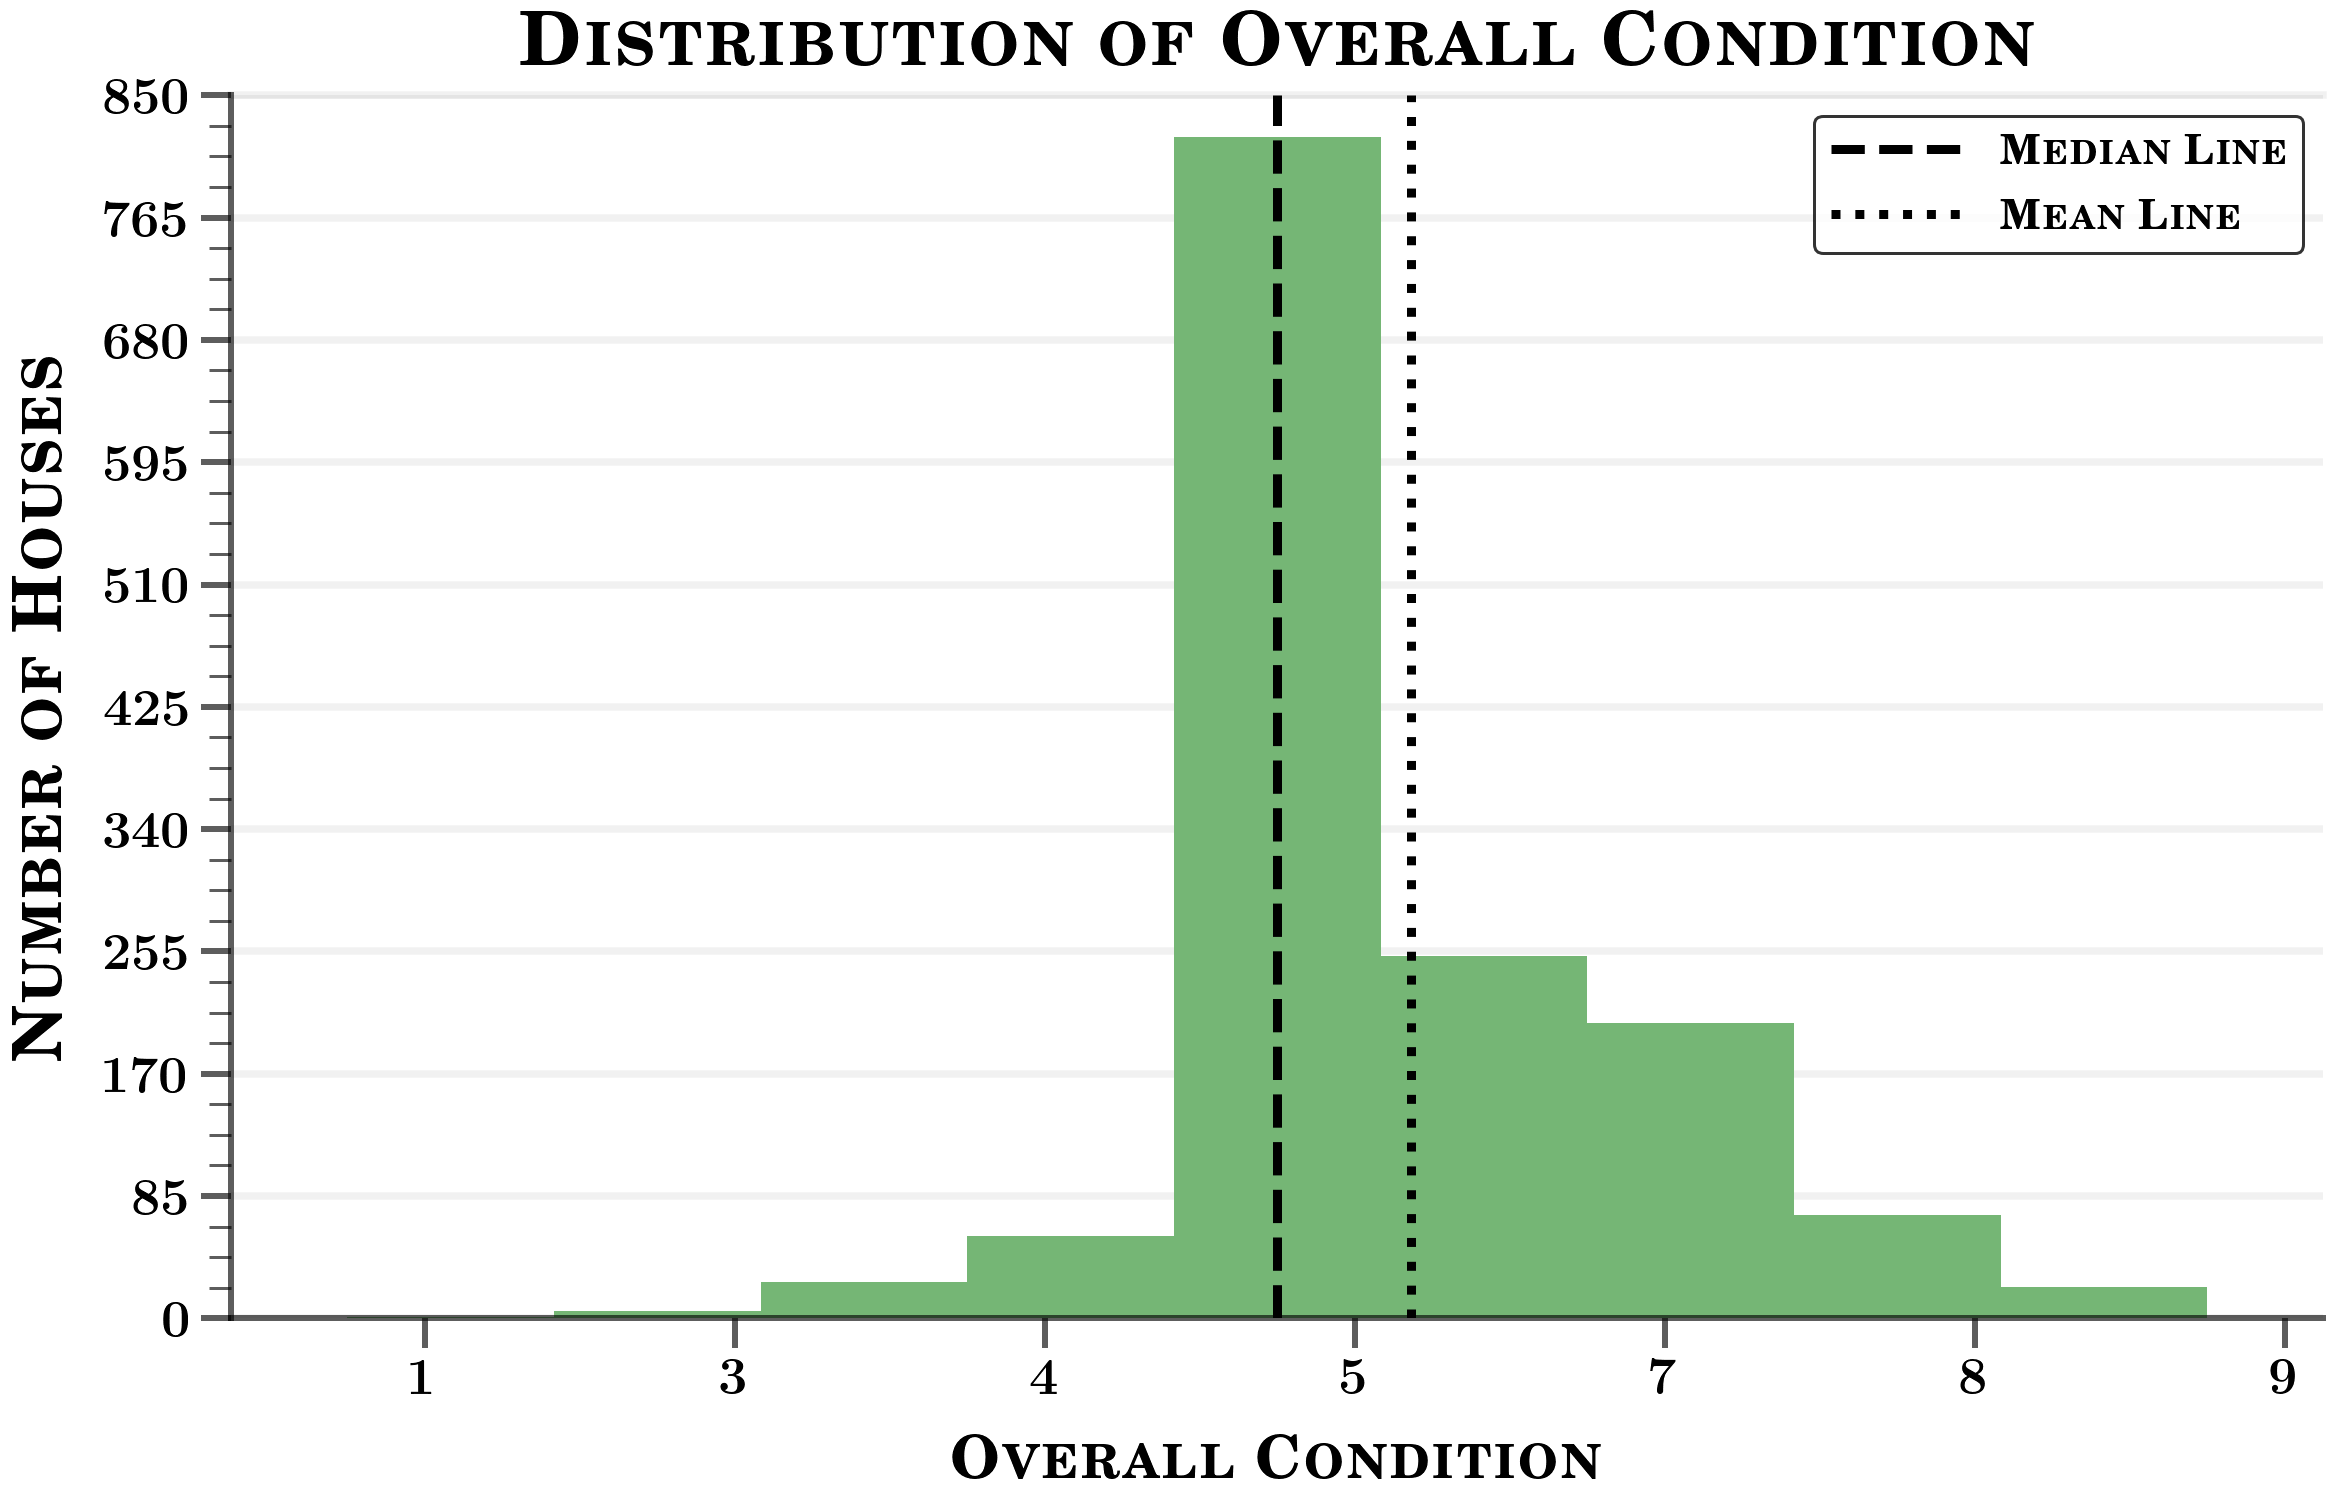

In [16]:
# Function for plot tile
#################################################################################################
def plot_title(tit):
    s = r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{'+tit+'}}}}'
    return s

# Setting up the figure and the axes
#################################################################################################
fig = plt.figure(figsize=(15,9), dpi=180)
gs = fig.add_gridspec(1, 1)
ax = gs.subplots()
renderer = fig.canvas.get_renderer()

# Getting and plotting the data
#################################################################################################
hist_kw = dict(color=get_lighter_color('forestgreen', .36), zorder=9)
#------------------------------------------------------------------------------------------------
oc_ser = df['OverallCond']
n_bins = df['OverallCond'].nunique()
oc_hist = ax.hist(oc_ser, bins=n_bins, **hist_kw)

# X Ticks
#################################################################################################
v_line_kw = dict(color='k', lw=3.6, zorder=9)
#------------------------------------------------------------------------------------------------
x_median = oc_ser.median()
x_mean = oc_ser.mean()
x_min = oc_ser.min()
x_max = oc_ser.max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 1
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 1
#------------------------------------------------------------------------------------------------
x_step = (x_max-x_min)/6
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(x_hist_convert)
ax.set_xbound(x_min-.5, x_max+.5)
#------------------------------------------------------------------------------------------------
med_line = ax.axvline(x_median, label=r'\textbf{\scshape{Median Line}}', ls='--', **v_line_kw)
mean_line = ax.axvline(x_mean, label=r'\textbf{\scshape{Mean Line}}', ls=':', **v_line_kw)

# Y Ticks
#################################################################################################
y_max = max(oc_hist[0])
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 50
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 50
#------------------------------------------------------------------------------------------------
y_step = y_max/10
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(y_hist_convert)
ax.set_ybound(0, y_max)

# Tick Params
#################################################################################################
tick_params(ax)

# Customize labels and title
#################################################################################################
lab_kw = dict(labelpad=15)
x_lab = 'Overall Condition'
y_lab = 'Number of Houses'
tit = 'Distribution of Overall Condition'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{24}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
ax.set_title(plot_title(tit), pad=12)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
leg_font_kw = dict(size=16.5)
leg_kw = dict(bbox_to_anchor=(1,1), loc='upper right', prop=leg_font_kw, labelspacing=.63, 
              handlelength=3.3)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg = ax.legend(handles=[med_line, mean_line], **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Overall Condition Dist.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Now, print out the mean, median, and standard deviation:

In [17]:
print('\033[1m'+'\033[4m'+'Overall Condition Distribution'+'\033[0m')
print('\033[1m'+'Mean = '+'\033[0m', '{:.3f}'.format(df['OverallCond'].mean()))
print('\033[1m'+'Std Dev = '+'\033[0m', '{:.3f}'.format(df['OverallCond'].std()))
print('-------------------------------------------')
print('\033[1m'+'5% = '+'\033[0m', '{:.0f}'.format(df['OverallCond'].quantile(.05)))
print('\033[1m'+'Median = '+'\033[0m', '{:.0f}'.format(df['OverallCond'].median()))
print('\033[1m'+'95% = '+'\033[0m', '{:.0f}'.format(df['OverallCond'].quantile(.95)))
print('-------------------------------------------')
display(df['OverallCond'].describe())

Overall Condition Distribution
Mean =  5.575
Std Dev =  1.113
-------------------------------------------
5% =  4
Median =  5
95% =  8
-------------------------------------------


count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In the cell below, interpret the above information.

In [18]:
print('Distribution has strong positive skew with a very tight distribution.')
print('It also is extremely tightly grouped below the mean.')
print('Even though it is tighly grouped, it does seem to have a possibly significant '+\
      'number of outliers.')
print('50% of values were between 5 and 6.')
print('90% of values were between 4 and 8.')

Distribution has strong positive skew with a very tight distribution.
It also is extremely tightly grouped below the mean.
Even though it is tighly grouped, it does seem to have a possibly significant number of outliers.
50% of values were between 5 and 6.
90% of values were between 4 and 8.


## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [19]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond'].map(lambda x: x<5)]
average_condition = df.loc[df['OverallCond'].map(lambda x: x==5)]
above_average_condition = df.loc[df['OverallCond'].map(lambda x: x>5)]

The following code checks that you created the subsets correctly:

In [20]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

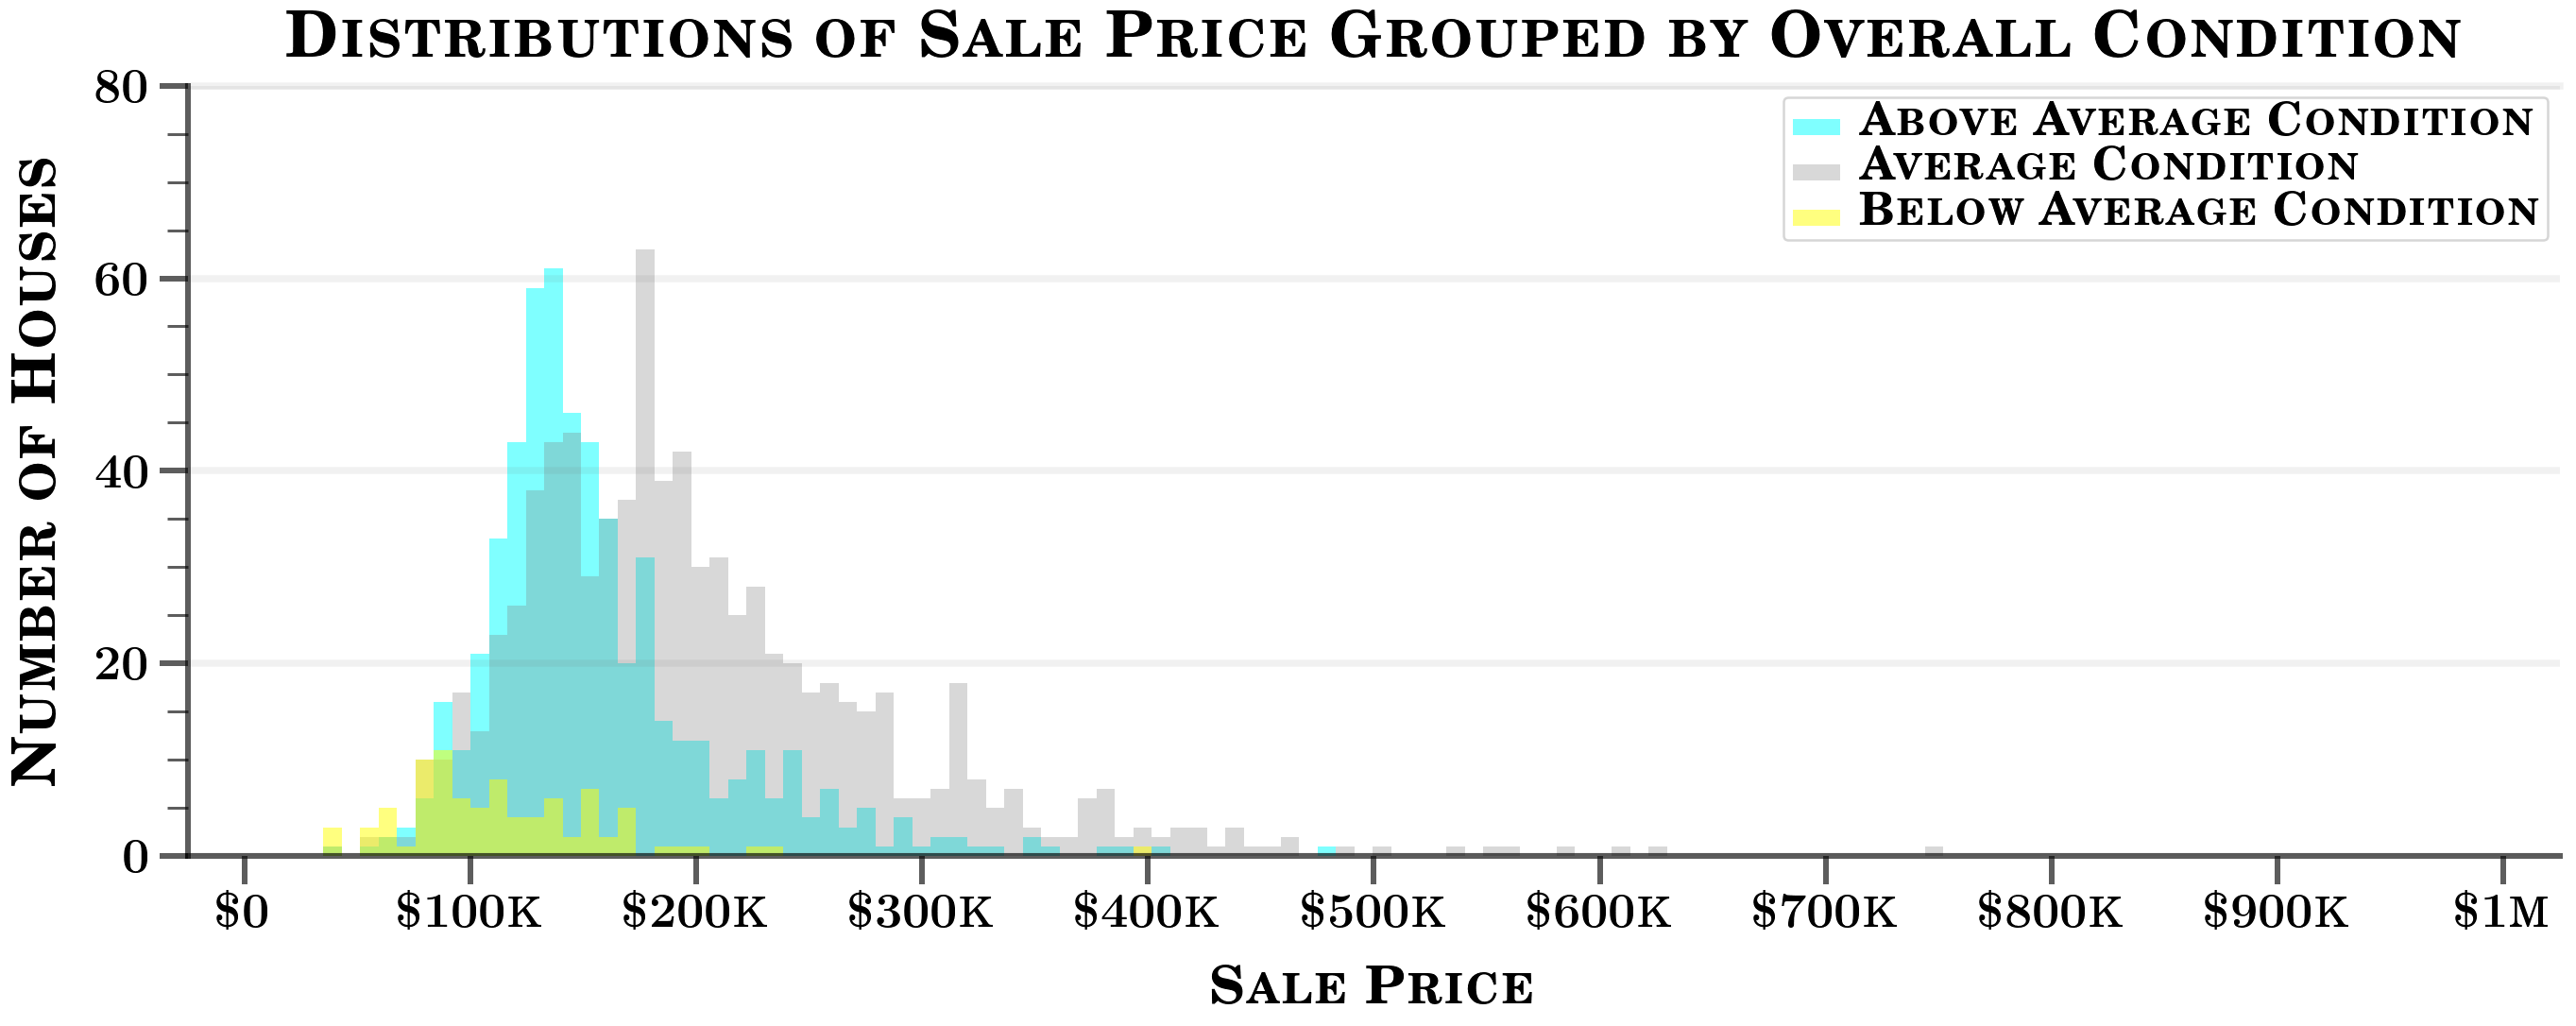

In [21]:
# Function for plot tile
#################################################################################################
def plot_title(tit):
    s = r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+tit+'}}}}'
    return s

# Setting up axes and plotting data
#################################################################################################
fig, ax = plt.subplots(figsize=(18,6), dpi=180)

# <--- NOT MINE BUT POSS IMPORTANT FOR FUTURE --->
# Create custom bins so all are on the same scale 
#################################################################################################
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# <--- NOT MINE BUT POSS IMPORTANT FOR FUTURE --->
# Plot three histograms, with reduced opacity (alpha) so we can see them overlapping
#################################################################################################
abv_lab = 'Above Average Condition'
avg_lab = 'Average Condition'
bel_lab = 'Below Average Condition'
#------------------------------------------------------------------------------------------------
abv_hist = ax.hist(x=above_average_condition["SalePrice"], bins=bins, color="cyan", alpha=0.5,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+abv_lab+'}}}}')
#------------------------------------------------------------------------------------------------
avg_hist = ax.hist(x=average_condition["SalePrice"], bins=bins, color="gray", alpha=0.3,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+avg_lab+'}}')
#------------------------------------------------------------------------------------------------
bel_hist = ax.hist(x=below_average_condition["SalePrice"], bins=bins, color="yellow", alpha=0.5,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+bel_lab+'}}}}')

# X Ticks
#################################################################################################
x_min = df["SalePrice"].min()
x_max = df["SalePrice"].max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 5*1e5
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 5*1e5
#------------------------------------------------------------------------------------------------
x_step = x_max/10
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(hist_currency)
ax.set_xbound(-2.5*1e4, x_max+2.5*1e4)

# Y Ticks
#################################################################################################
y_max = max([max(abv_hist[0]), max(avg_hist[0]), max(bel_hist[0])])
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 20
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 20
#------------------------------------------------------------------------------------------------
y_step = y_max/4
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(y_hist_convert)
ax.set_ybound(0, y_max)

# Tick Params
#################################################################################################
tick_params(ax)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
lab_kw = dict(labelpad=15)
x_lab = 'Sale Price'
y_lab = 'Number of Houses'
tit = 'Distributions of Sale Price Grouped by Overall Condition'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{22.5}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{25.5}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
ax.set_title(plot_title(tit), pad=12)
ax.legend()
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Grouped Ovr Condition - 5.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [22]:
print('''    The fact that the 'above average condition' category corresponds to a generally lower \
Sale Price than the 'average condition' category scale is a surpirse.
    
    They may need to be revised to be based around the actual mean not simply 5 because it is \
likely that too many 'below average condition' rooms got included in the 'average condition' \
category.''')

    The fact that the 'above average condition' category corresponds to a generally lower Sale Price than the 'average condition' category scale is a surpirse.
    
    They may need to be revised to be based around the actual mean not simply 5 because it is likely that too many 'below average condition' rooms got included in the 'average condition' category.


### This is my check on the data by using by redefining the groups to be within a standard deviation of the mean.

In [23]:
# Replace None with appropriate code
ovr_mean = df['OverallCond'].mean()
ovr_std = df['OverallCond'].std()

below_average_condition = df.loc[df['OverallCond'].map(lambda x: x<=(ovr_mean - ovr_std))]
average_condition = df.loc[df['OverallCond'].map(lambda x: 
                                                 (ovr_mean - ovr_std)<x<(ovr_mean + ovr_std))]
above_average_condition = df.loc[df['OverallCond'].map(lambda x: x>=(ovr_mean + ovr_std))]

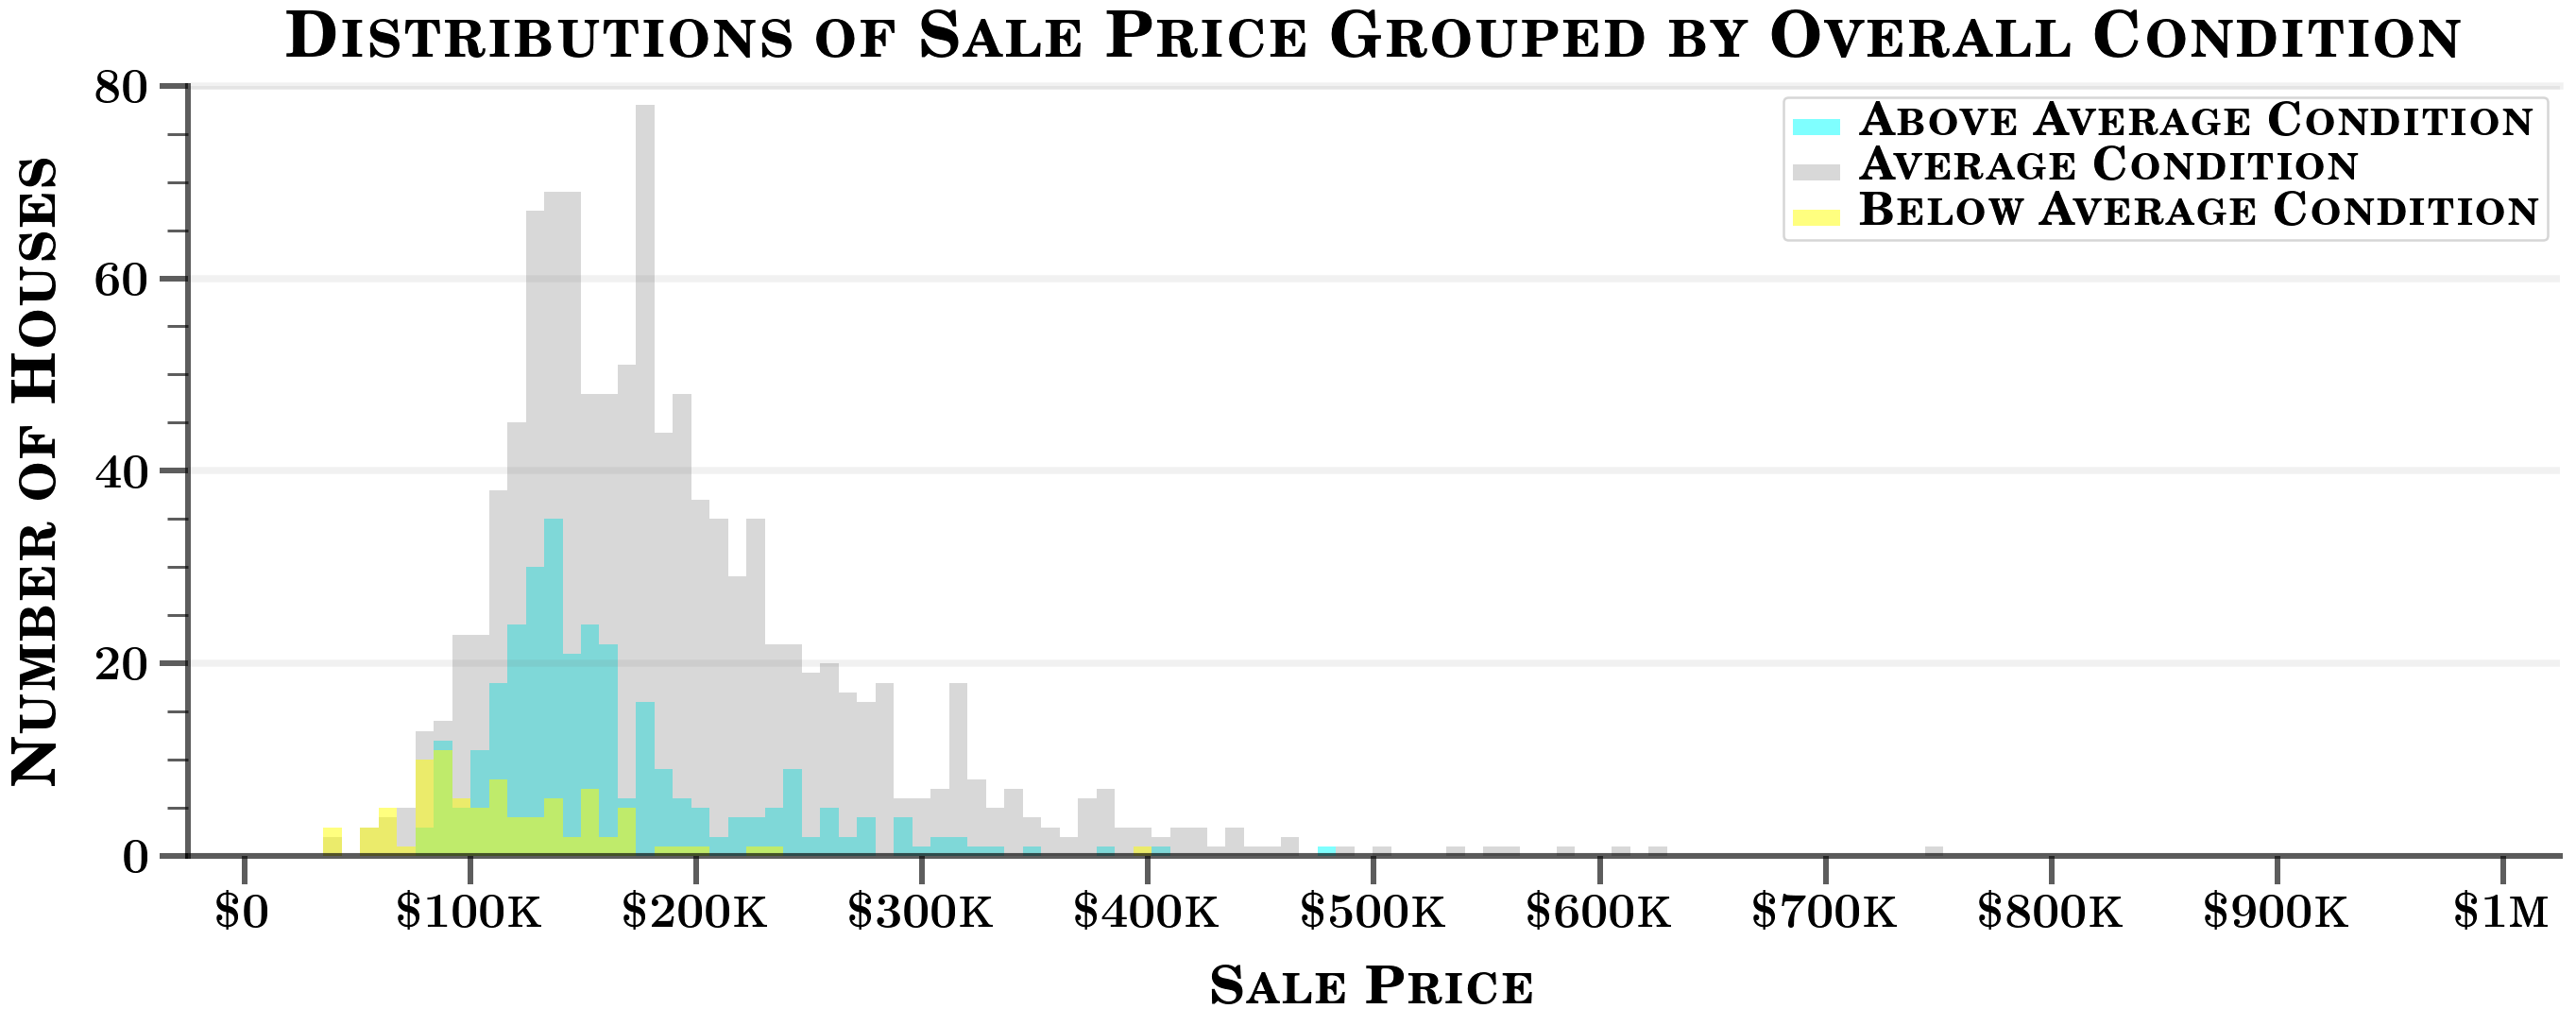

In [24]:
# Function for plot tile
#################################################################################################
def plot_title(tit):
    s = r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+tit+'}}}}'
    return s

# Setting up axes and plotting data
#################################################################################################
fig, ax = plt.subplots(figsize=(18,6), dpi=180)

# <--- NOT MINE BUT POSS IMPORTANT FOR FUTURE --->
# Create custom bins so all are on the same scale 
#################################################################################################
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# <--- NOT MINE BUT POSS IMPORTANT FOR FUTURE --->
# Plot three histograms, with reduced opacity (alpha) so we can see them overlapping
#################################################################################################
abv_lab = 'Above Average Condition'
avg_lab = 'Average Condition'
bel_lab = 'Below Average Condition'
#------------------------------------------------------------------------------------------------
abv_hist = ax.hist(x=above_average_condition["SalePrice"], bins=bins, color="cyan", alpha=0.5,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+abv_lab+'}}}}')
#------------------------------------------------------------------------------------------------
avg_hist = ax.hist(x=average_condition["SalePrice"], bins=bins, color="gray", alpha=0.3,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+avg_lab+'}}')
#------------------------------------------------------------------------------------------------
bel_hist = ax.hist(x=below_average_condition["SalePrice"], bins=bins, color="yellow", alpha=0.5,
                   label=r'{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{'+bel_lab+'}}}}')

# X Ticks
#################################################################################################
x_min = df["SalePrice"].min()
x_max = df["SalePrice"].max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 5*1e5
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 5*1e5
#------------------------------------------------------------------------------------------------
x_step = x_max/10
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(hist_currency)
ax.set_xbound(-2.5*1e4, x_max+2.5*1e4)

# Y Ticks
#################################################################################################
y_max = max([max(abv_hist[0]), max(avg_hist[0]), max(bel_hist[0])])
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 20
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 20
#------------------------------------------------------------------------------------------------
y_step = y_max/4
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(y_hist_convert)
ax.set_ybound(0, y_max)

# Tick Params
#################################################################################################
tick_params(ax)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
lab_kw = dict(labelpad=15)
x_lab = 'Sale Price'
y_lab = 'Number of Houses'
tit = 'Distributions of Sale Price Grouped by Overall Condition'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{22.5}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{25.5}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
ax.set_title(plot_title(tit), pad=12)
ax.legend()
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Grouped Ovr Condition - StdDev.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

In [25]:
print('''    This method resulted in more 'average condition' houses and less 'above average condition', \
but the number of 'below average condition' houses remained basically the same, and the 'above \
average' houses are still less expensive than the 'average' ones, so something else is going \
on that requires further investigation.  One possibility is that people may have a bias to be \
negative in their reviews. Another possibility is that nicer, yet cheaper homes were sold at \
some point.''')

    This method resulted in more 'average condition' houses and less 'above average condition', but the number of 'below average condition' houses remained basically the same, and the 'above average' houses are still less expensive than the 'average' ones, so something else is going on that requires further investigation.  One possibility is that people may have a bias to be negative in their reviews. Another possibility is that nicer, yet cheaper homes were sold at some point.


## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [26]:
print('\033[1m'+'Total Cols ='+'\033[0m', len(df.columns))
df_num_cols = list(df.columns[df.columns.map(lambda x: df[x].dtype!=object)])
print('\033[1m'+'Number of Numerical Columns ='+'\033[0m',len(df_num_cols))
print('\033[1m'+'Numerical Columns ='+'\033[0m',df_num_cols)
df_cat_cols = list(df.columns[df.columns.map(lambda x: df[x].dtype==object)])
print('\033[1m'+'Number of Categorical Columns ='+'\033[0m',len(df_cat_cols))
print('\033[1m'+'Categorical Columns ='+'\033[0m',df_cat_cols)

Total Cols = 80
Number of Numerical Columns = 37
Numerical Columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Number of Categorical Columns = 43
Categorical Columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 

In [27]:
sp_corr_ser = df.corr().drop(['SalePrice'])['SalePrice']
max_sp_corr = sp_corr_ser.max()
max_ser = sp_corr_ser.loc[sp_corr_ser.index.map(lambda x: sp_corr_ser[x]==max_sp_corr)]
print(max_ser)

OverallQual    0.790982
Name: SalePrice, dtype: float64


Now, find the ***most negatively correlated*** column:

In [28]:
sp_corr_ser = df.corr().drop(['SalePrice'])['SalePrice']
min_sp_corr = sp_corr_ser.min()
min_ser = sp_corr_ser.loc[sp_corr_ser.index.map(lambda x: sp_corr_ser[x]==min_sp_corr)]
print(min_ser)

KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


Once you have your answer, edit the code below so that it produces a scatter plot of the relevant columns.

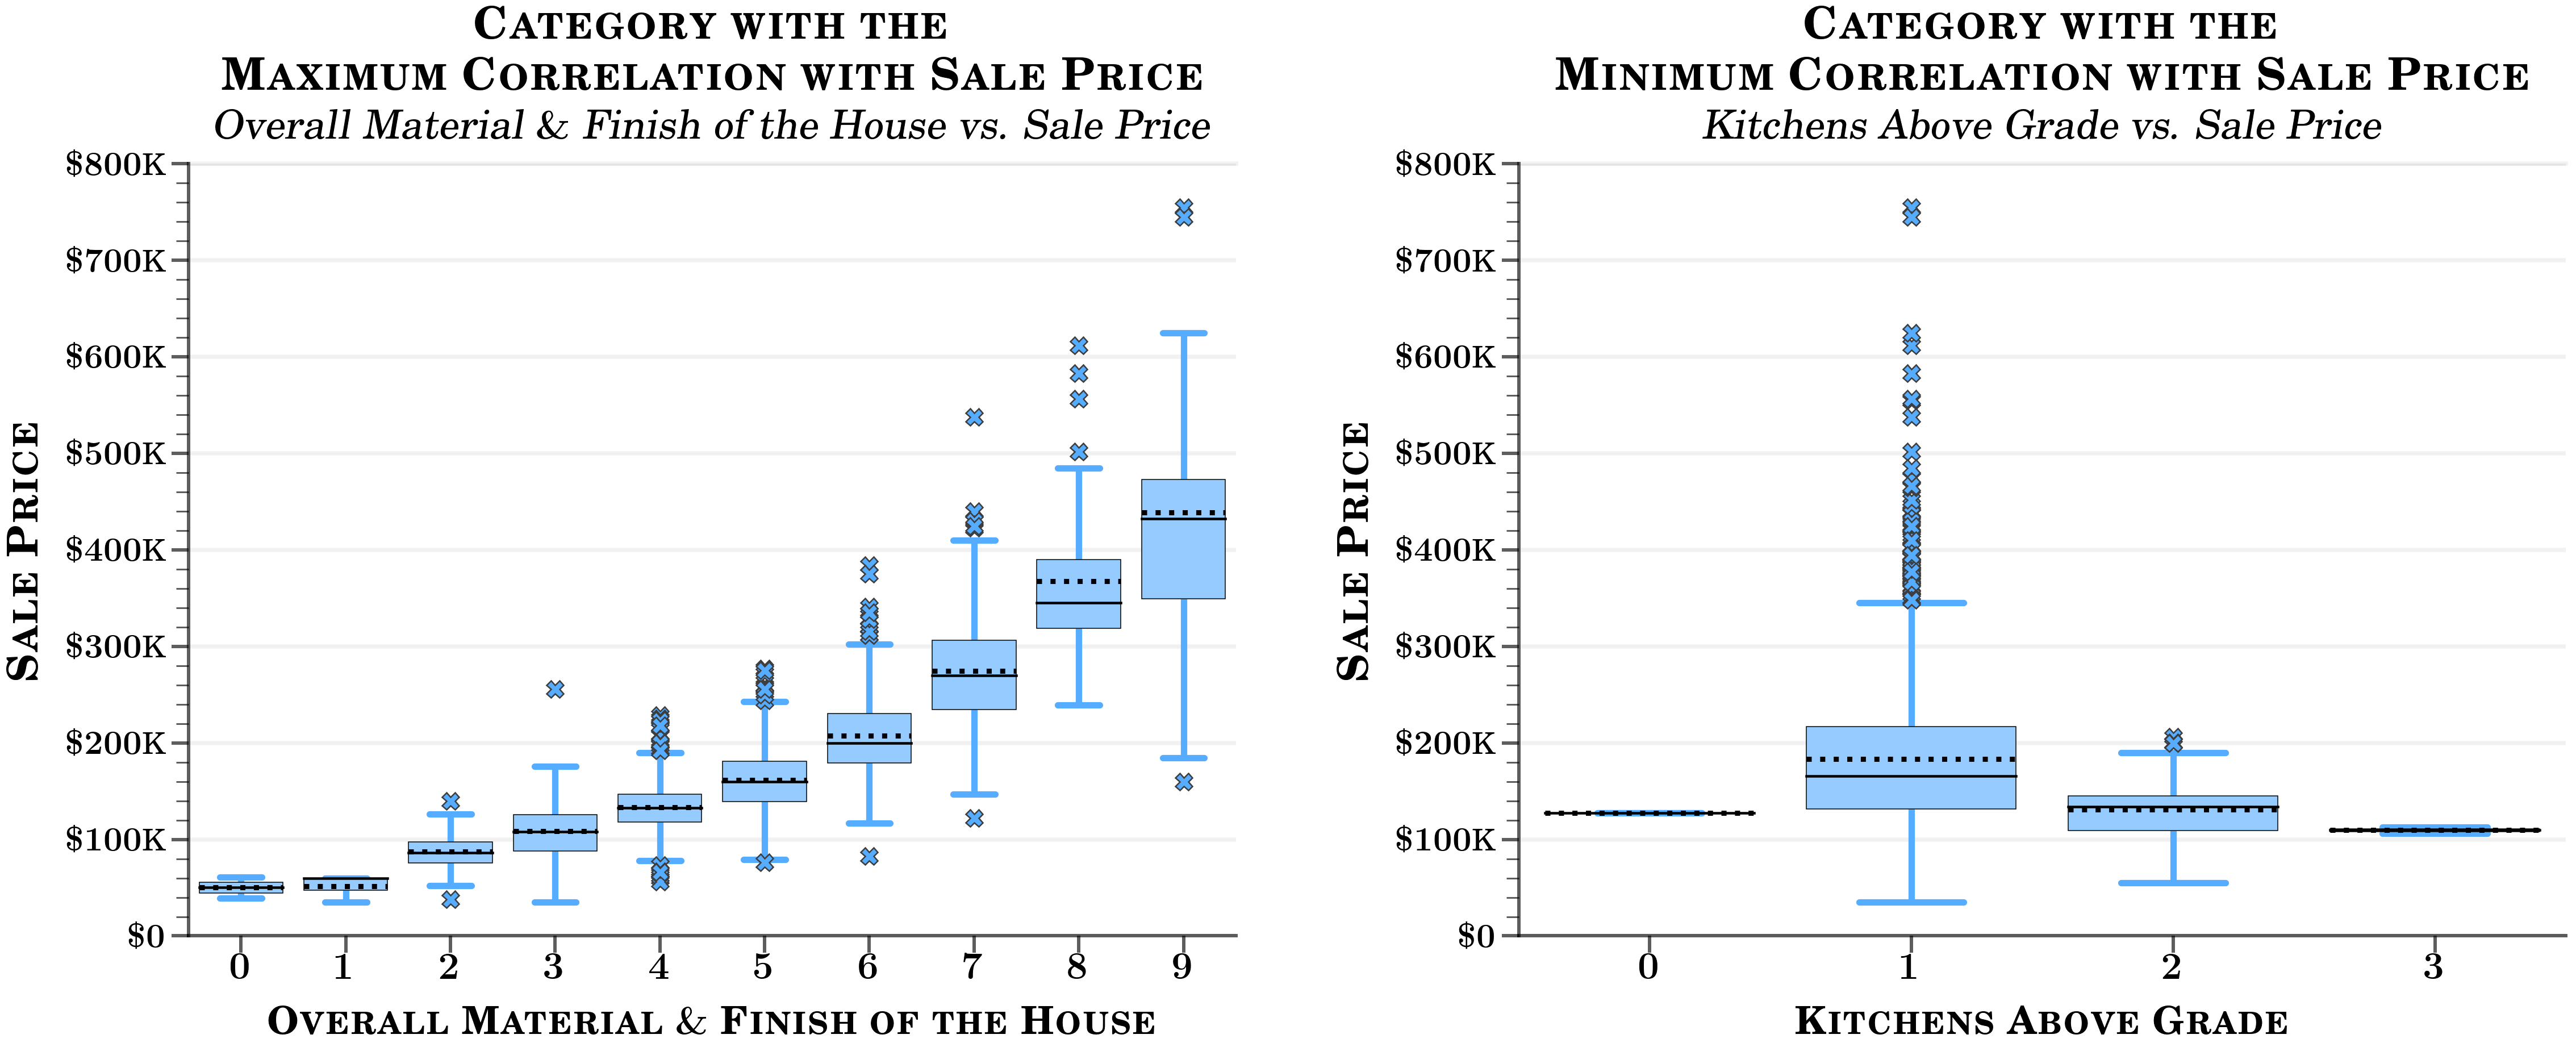

In [29]:
# Function to format y ticks
#################################################################################################
def box_x_convert(x, pos):
    s = r'{\fontsize{27}{0}\selectfont{$\mathbf{'+'{:.0f}'.format(x)+'}$}}'
    return s

# Function to format currency ticks
#################################################################################################
def box_currency(y, pos):
    if y != 0:
        s = r'{\fontsize{24}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+\
            '{:.0f}'.format(y*1e-3)+'}$}}'+r'{\fontsize{21}{0}\selectfont{\scshape{K}}}'
    else:
        s = r'{\fontsize{24}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+str(0)+'}$}}'
    return s

# Function for plot tile
#################################################################################################
def plot_title(tit, lab):
    s = r'{\fontsize{31.5}{0}\selectfont{\textbf{\scshape{Category with the}}}}'+'\n'+   \
        r'{\fontsize{31.5}{0}\selectfont{\textbf{\scshape{'+tit+'}}}}'+'\n'+   \
        r'{\fontsize{28.5}{0}\selectfont{\textsl{'+lab+' vs. Sale Price}}}'
    return s

# Setting up axes and plotting data
#################################################################################################
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(30,10), dpi=180, gridspec_kw={'wspace':.27})
renderer = fig.canvas.get_renderer()
#------------------------------------------------------------------------------------------------
faded_color = get_lighter_color('dodgerblue', .27)
#------------------------------------------------------------------------------------------------
box_kw = dict(color=get_lighter_color(faded_color, .36), lw=.6, ec='k', zorder=6)
means_kw = dict(color='k', ls=':', lw=3.6, zorder=20)
medians_kw = dict(color='k', lw=1.8, zorder=9)
fliers_kw = dict(marker='X', mfc=faded_color)
whis_kw = dict(color=faded_color, lw=4.5, solid_capstyle='butt')
caps_kw = dict(color=faded_color, lw=4.5, solid_capstyle='round')

# Plot distribution of column with highest correlation
#################################################################################################
max_box = sns.boxplot(x=df[max_ser.index[0]], y=df["SalePrice"], ax=ax1, fliersize=12, 
                      boxprops=box_kw, medianprops=medians_kw, meanline=True, showmeans=True, 
                      meanprops=means_kw, flierprops=fliers_kw, whiskerprops=whis_kw, 
                      capprops=caps_kw)

# Plot distribution of column with most negative correlation
#################################################################################################
min_box = sns.boxplot(x=df[min_ser.index[0]], y=df["SalePrice"], ax=ax2, fliersize=12, 
                      boxprops=box_kw, medianprops=medians_kw, meanline=True, showmeans=True, 
                      meanprops=means_kw, flierprops=fliers_kw, whiskerprops=whis_kw, 
                      capprops=caps_kw)

ax1_fliers = [art.get_tightbbox(renderer).max[0] for art in ax1.get_children() \
              if type(art)==mpatches.PathPatch]

ax2_fliers = [art.get_tightbbox(renderer).max[1] for art in ax1.get_children() \
              if type(art)==mpatches.PathPatch]

# X and Y ticks for Both Plots
#################################################################################################
for i_ax in [ax1, ax2]:
    i_ax.xaxis.set_major_formatter(box_x_convert)
    #--------------------------------------------------------------------------------------------
    y_max = 0
    #--------------------------------------------------------------------------------------------
    all_flier_max = [art.get_ydata().max() for art in i_ax.get_children() \
                     if type(art)==mlines.Line2D and art.get_marker()=='X' \
                     and art.get_ydata().size > 0]
    #--------------------------------------------------------------------------------------------
    y_max = max(all_flier_max) if max(all_flier_max)>y_max else y_max
    #--------------------------------------------------------------------------------------------
    top_found = False
    test_y = 1*1e5
    while not (top_found):
        if y_max<=test_y:
            y_max = test_y
            top_found = True
        else:
            test_y += 1*1e5
    #--------------------------------------------------------------------------------------------
    y_step = y_max/8
    #--------------------------------------------------------------------------------------------
    y_tick_max = y_max 
    y_ticks = np.arange(0, y_tick_max+1, y_step)
    i_ax.set_yticks(y_ticks)
    i_ax.yaxis.set_major_formatter(box_currency)
    i_ax.set_ybound(0, y_max)

# Tick Params
#################################################################################################
tick_params(ax1)
tick_params(ax2)
    
# Setting legend, saving the plot, and showing the plots
#################################################################################################
lab_kw = dict(labelpad=18)
tit_kw = dict(pad=18, linespacing=1.65)
#------------------------------------------------------------------------------------------------
lab_1 = r'Overall Material $\boldsymbol{\&}$ Finish of the House'
lab_2 = 'Kitchens Above Grade'
#------------------------------------------------------------------------------------------------
tit_1 = 'Maximum Correlation with Sale Price'
tit_2 = 'Minimum Correlation with Sale Price'
#------------------------------------------------------------------------------------------------
ax1.set_xlabel(r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+lab_1+'}}}}', **lab_kw)
ax1.set_ylabel(r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{Sale Price}}}}', **lab_kw)
ax1.set_title(plot_title(tit_1, lab_1), **tit_kw)
#------------------------------------------------------------------------------------------------
ax2.set_xlabel(r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{'+lab_2+'}}}}', **lab_kw)
ax2.set_ylabel(r'{\fontsize{30}{0}\selectfont{\textbf{\scshape{Sale Price}}}}', **lab_kw)
ax2.set_title(plot_title(tit_2, lab_2), **tit_kw)
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Max and Min Corr Columns.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [30]:
print("""    There is a strong postive relationship in the first plot and a weak negative \
relationship in the second.  After looking at the documentation, Overall Material & Finish of \
the House is a rating system, with higher numbers corresponding to higher rating, so that \
relationship makes sense.  However, the fact that the less expensive homes seem to have more \
than one kitchen is counterintuitive and would require further examination to explain.
""")

    There is a strong postive relationship in the first plot and a weak negative relationship in the second.  After looking at the documentation, Overall Material & Finish of the House is a rating system, with higher numbers corresponding to higher rating, so that relationship makes sense.  However, the fact that the less expensive homes seem to have more than one kitchen is counterintuitive and would require further examination to explain.



## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [31]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

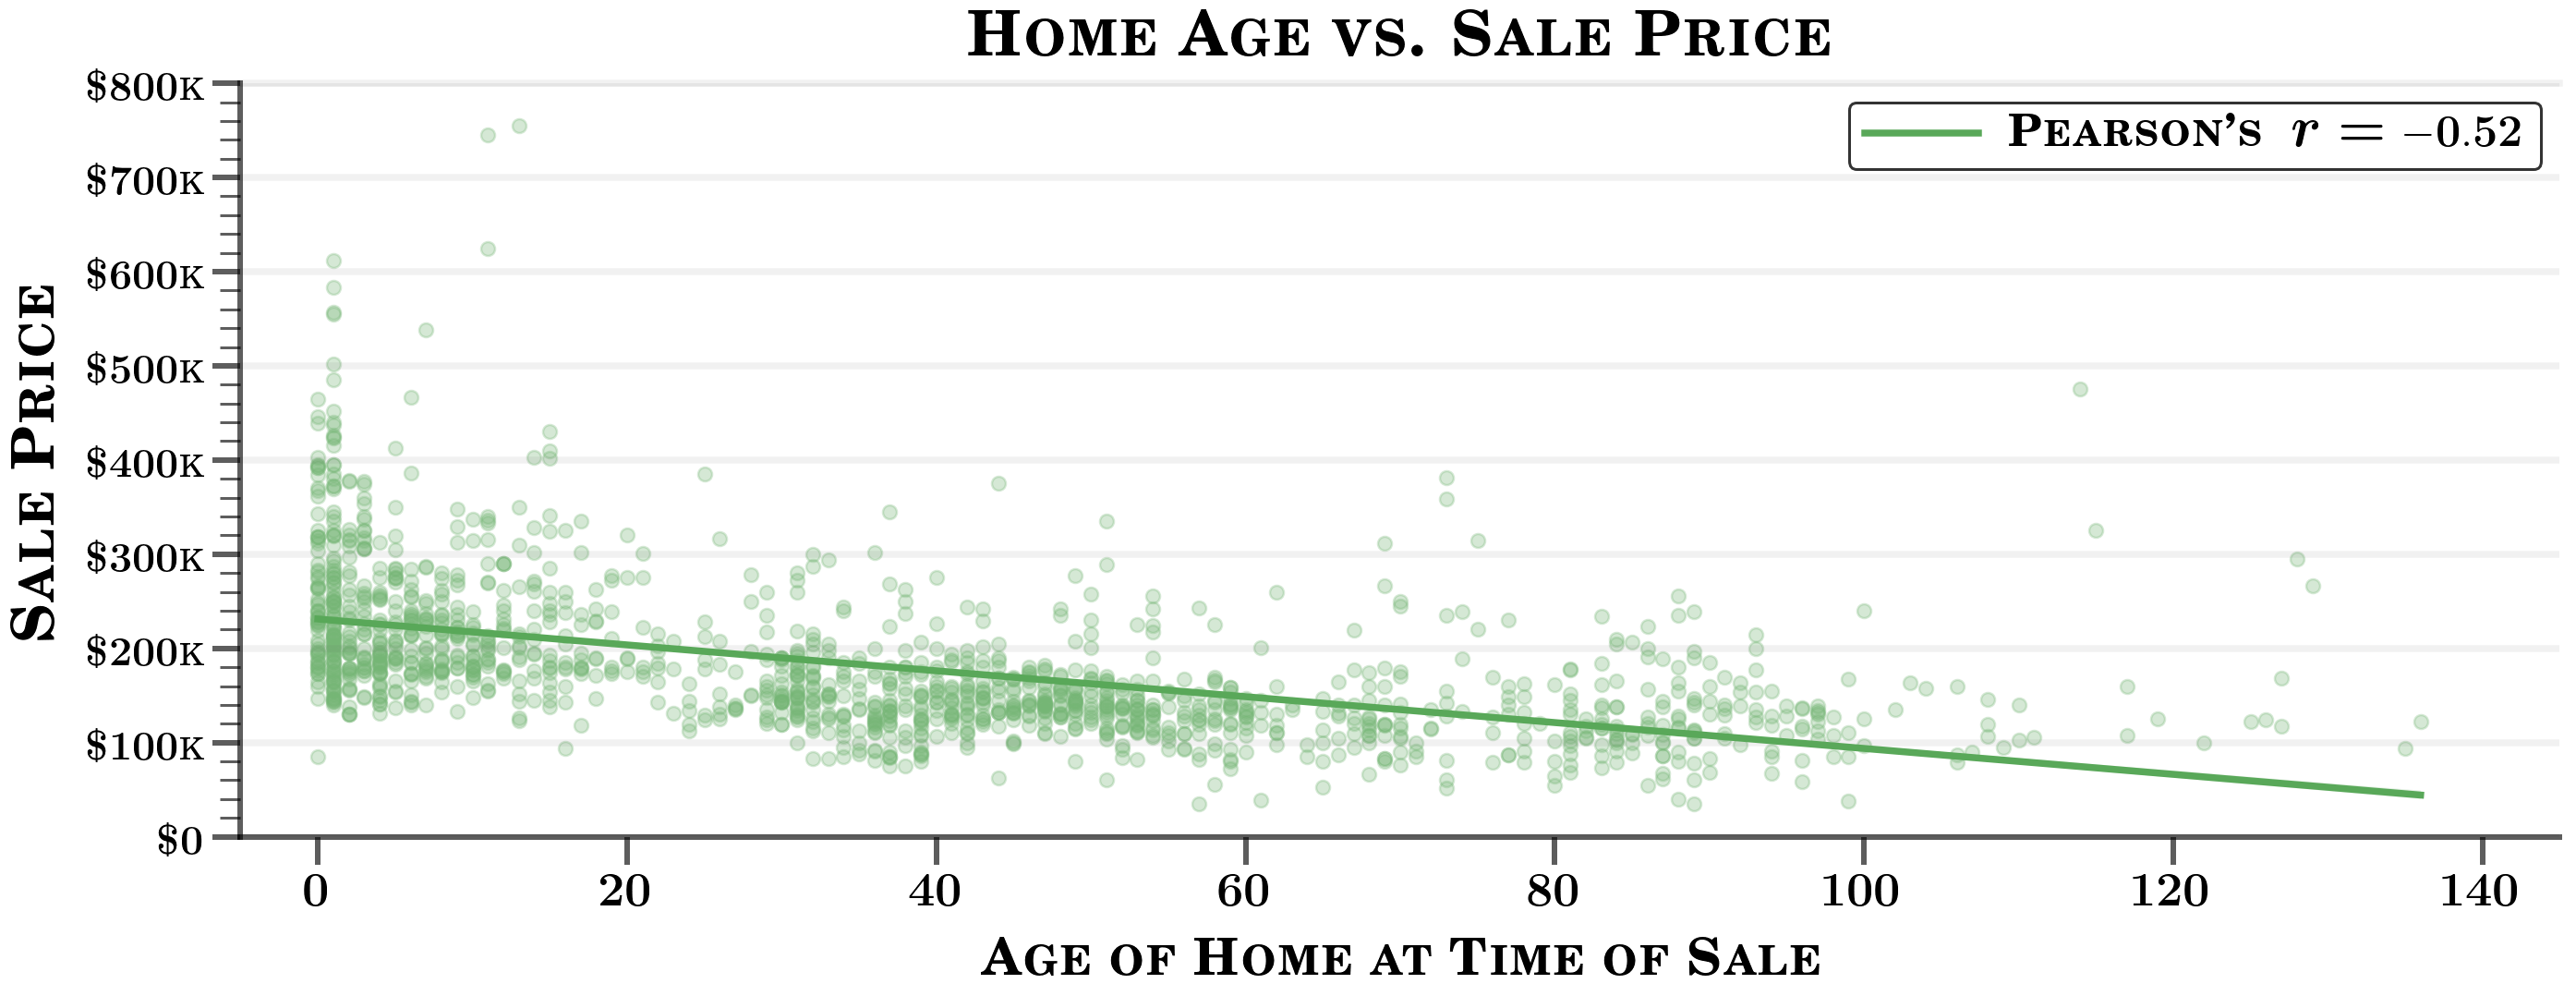

In [32]:
# Function to format currency ticks
#################################################################################################
def final_currency(x, pos):
    if x != 0:
        s = r'{\fontsize{18}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+\
            '{:.0f}'.format(x*1e-3)+'}$}}'+r'{\fontsize{13.5}{0}\selectfont{\scshape{K}}}'
    else:
        s = r'{\fontsize{18}{0}\selectfont{$\boldsymbol{\$}\mathbf{'+str(0)+'}$}}'
    return s

# Function for plot tile
#################################################################################################
def plot_title():
    s = r'{\fontsize{27}{0}\selectfont{\textbf{\scshape{Home Age vs. Sale Price}}}}'
    return s

# Make a new column, Age
#################################################################################################
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
#################################################################################################
fig, ax = plt.subplots(figsize=(18,6), dpi=180)

# Plot Age vs. SalePrice
#################################################################################################
line_faded_color = get_lighter_color('forestgreen', .27)
line_kw = dict(color=line_faded_color, lw=3)
#------------------------------------------------------------------------------------------------
faded_color = get_lighter_color("forestgreen", .36)
#------------------------------------------------------------------------------------------------
sns.regplot(x=df["Age"], y=df["SalePrice"], ax=ax, ci=50, line_kws=line_kw, scatter=False)
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color=faded_color)

# X Ticks
#################################################################################################
x_max = df["Age"].max()
#------------------------------------------------------------------------------------------------
right_found = False
test_x = 10
while not (right_found):
    if x_max<=test_x:
        x_max = test_x
        right_found = True
    else:
        test_x += 10
#------------------------------------------------------------------------------------------------
x_step = x_max/7
#------------------------------------------------------------------------------------------------
x_tick_max = x_max 
x_ticks = np.arange(0, x_tick_max+1, x_step)
#------------------------------------------------------------------------------------------------
ax.set_xticks(x_ticks)
ax.xaxis.set_major_formatter(y_hist_convert)
ax.set_xbound(-5, x_max+5)

# Y Ticks
#################################################################################################
y_max = df["SalePrice"].max()
#------------------------------------------------------------------------------------------------
top_found = False
test_y = 1*1e5
while not (top_found):
    if y_max<=test_y:
        y_max = test_y
        top_found = True
    else:
        test_y += 1*1e5
#------------------------------------------------------------------------------------------------
y_step = y_max/8
#------------------------------------------------------------------------------------------------
y_tick_max = y_max 
y_ticks = np.arange(0, y_tick_max+1, y_step)
#------------------------------------------------------------------------------------------------
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter(final_currency)
ax.set_ybound(0, y_max)

# Tick Params
#################################################################################################
tick_params(ax)

# Customize labels and title
#################################################################################################
lab_kw = dict(labelpad=12)
tit_kw = dict(pad=9)
#------------------------------------------------------------------------------------------------
x_lab = 'Age of Home at Time of Sale'
y_lab = 'Sale Price'
#------------------------------------------------------------------------------------------------
ax.set_xlabel(r'{\fontsize{22.5}{0}\selectfont{\textbf{\scshape{'+x_lab+'}}}}', **lab_kw)
ax.set_ylabel(r'{\fontsize{25.5}{0}\selectfont{\textbf{\scshape{'+y_lab+'}}}}', **lab_kw)
#------------------------------------------------------------------------------------------------
ax.set_title(plot_title(), pad=12)

# Setting legend, saving the plot, and showing the plots
#################################################################################################
pear_r = np.corrcoef(df["Age"], df["SalePrice"])[0][1]
#------------------------------------------------------------------------------------------------
leg_font_kw = dict(size=16.5)
leg_kw = dict(bbox_to_anchor=(1,1), loc='upper right', prop=leg_font_kw, labelspacing=.63, 
              handlelength=3)
frame_kw = dict(lw=1.2, ec='k')
#------------------------------------------------------------------------------------------------
leg_text = [r"{\fontsize{19.5}{0}\selectfont{\textbf{\scshape{Pearson's }}}}"+   \
            r'{\fontsize{24}{0}\selectfont{\ $\boldsymbol{r}$\ $\boldsymbol{=}$\ }}'+   \
            r'{\fontsize{19.5}{0}\selectfont{$\mathbf{'+'{:.2f}'.format(pear_r)+'}$}}']
leg_line = [mlines.Line2D([],[], color=line_faded_color, lw=3)]
leg = ax.legend(handles=leg_line, labels=leg_text, **leg_kw)
#------------------------------------------------------------------------------------------------
plt.setp(leg.get_frame(), **frame_kw)
#------------------------------------------------------------------------------------------------
fig.savefig('visuals\Home Age vs Sale Price.jpeg', format='jpeg', bbox_inches='tight')
#------------------------------------------------------------------------------------------------
plt.show()

Interpret this plot below:

In [33]:
print('''    Home Age and Sale Price are negatively correlated.  Newer homes should cost more, \
and older homes should cost less.  With a Pearson's r of '''+str(round(pear_r,2))+\
'''it is a moderate negative relationship.The amount of houses being built varied over time.\n
    There were some periods in which the amount of homes being built dropped, but home building \
has generally increased over time.

    The most important thing in my opinion is the sharp increase in more expensive homes being \
built in the most recent years.''')

    Home Age and Sale Price are negatively correlated.  Newer homes should cost more, and older homes should cost less.  With a Pearson's r of -0.52it is a moderate negative relationship.The amount of houses being built varied over time.

    There were some periods in which the amount of homes being built dropped, but home building has generally increased over time.

    The most important thing in my opinion is the sharp increase in more expensive homes being built in the most recent years.


## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.